# Data Visualization 
# Week 7: Advanced Data Visualization

In [1]:
# Import Python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Bubble plot

In [2]:
# pip install gapminder 

from gapminder import gapminder 

In [3]:
gapminder.sample(5)

country continent  year  lifeExp        pop     gdpPercap
1405   South Africa    Africa  1957   47.985   16151549   5487.104219
715       Indonesia      Asia  1987   60.137  169276000   1748.356961
763          Israel      Asia  1987   75.600    4203148  17122.479860
362   Cote d'Ivoire    Africa  1962   44.930    3832408   1728.869428
610       Guatemala  Americas  2002   68.978   11178650   4858.347495

In [4]:
gapminder['year'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

In [5]:
data = gapminder.loc[gapminder.year == 2007]
data.sample(5)

country continent  year  lifeExp       pop     gdpPercap
911      Libya    Africa  2007   73.952   6036914  12057.499280
215    Burundi    Africa  2007   49.580   8390505    430.070692
1127     Niger    Africa  2007   56.867  12894865    619.676892
947   Malaysia      Asia  2007   74.241  24821286  12451.655800
503    Eritrea    Africa  2007   58.040   4906585    641.369524

In [6]:
data.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [7]:
continent_mapping = {
    'Asia': 1,
    'Europe': 2,
    'Africa': 3,
    'Americas': 4,
    'Oceania': 5
}

In [8]:
data['continent_map'] = data['continent'].map(continent_mapping)

In [9]:
X = data['gdpPercap']
y = data['lifeExp']
size = data['pop']/100000   #poplutation per 100,000 
color = data['continent_map']

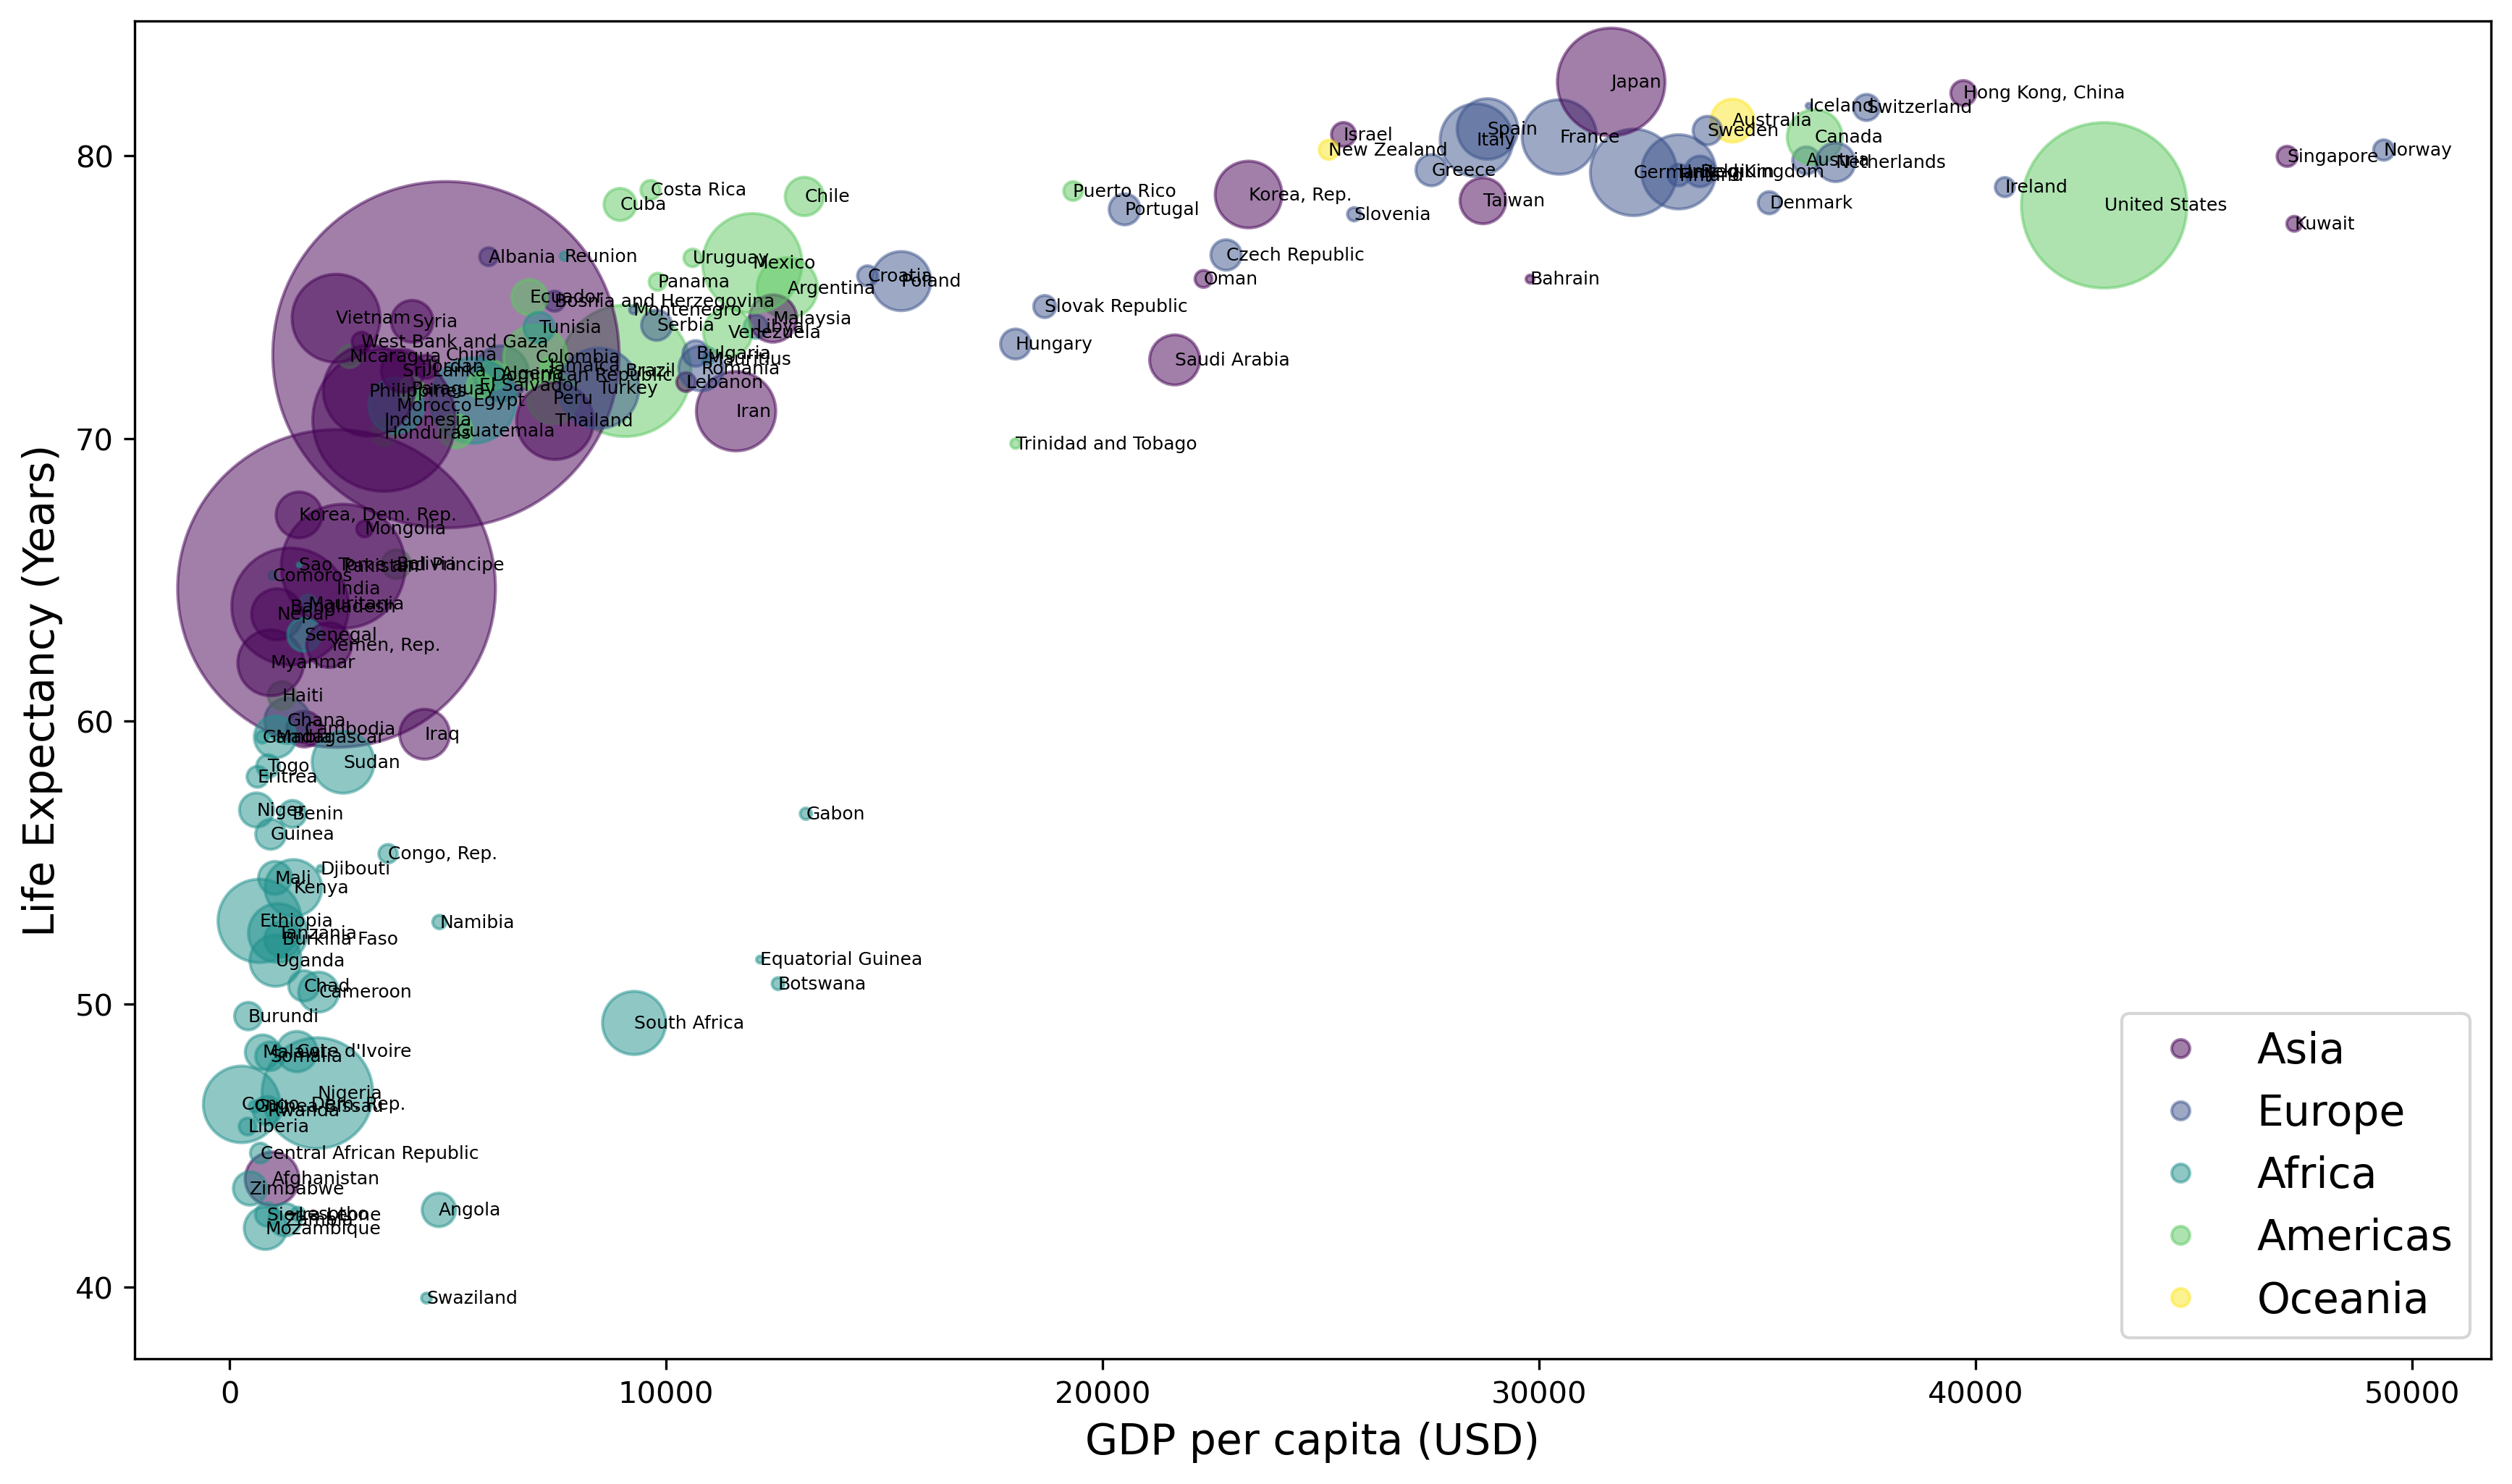

In [10]:
plt.figure(figsize = (14, 8), dpi = 300)
scatter = plt.scatter(X, y, s = size, c = color, alpha = 0.5, cmap = 'viridis')

for X_val, y_val, country in zip(X, y, data['country']):
    plt.text(X_val, y_val, country, fontsize = 6, ha = 'left', va = 'center')    
    
plt.xlabel("GDP per capita (USD)", size = 14)
plt.ylabel("Life Expectancy (Years)", size = 14)

# Create a dictionary to map continent_map values back to continent names
continent_mapping_inv = {v: k for k, v in continent_mapping.items()}

# Create legend label
legend_labels = [continent_mapping_inv[continent_num] for continent_num in data['continent_map'].unique()]

# Add legend label
plt.legend(handles=scatter.legend_elements()[0], 
               labels=legend_labels, 
               loc = 'lower right',
               fontsize=14)

plt.show()

## Plotly 

In [11]:
# Please install plotly and U kaleido 
# pip install plotly
# pip install -U kaleido 

import plotly.express as px

In [12]:
# Creating the bubble plot using Plotly library 

fig = px.scatter(data,                                     # Input data
                 x = "gdpPercap",                          # The column to be used as the X axis
                 y = "lifeExp",                                 # The column to be used as the y axis
                 size = "pop",                                 # The column to be used as size of the markers 
                 color = "continent",                       # The column used to assign different colors to markers
                 hover_name = "country",              # The column used to display when hovering over data points
                 log_x = True,  
                 size_max = 60)                            # Maximum marker size

# Update x-axis and y-axis labels
fig.update_xaxes(title_text = "GDP per Capita (USD)")
fig.update_yaxes(title_text = "Life Expectancy (Years)")  

# Update legend title
fig.update_layout(legend_title_text = "Continent")

# Set the figure size
fig.update_layout(width = 800,  height = 500)

# Export the figure 
#fig.write_image("bubble_plot.png", scale=3.0)

# Show the plot
fig.show()

In [13]:
#Print out the names of the color scales

plotly_colorscales = px.colors.named_colorscales()
sorted_colorscales = sorted(plotly_colorscales)
print(sorted_colorscales)

['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance', 'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg', 'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl', 'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric', 'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys', 'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet', 'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges', 'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl', 'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn', 'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu', 'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar', 'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn', 'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid', 'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr', 'ylorrd']


In [14]:
#  View the built-in sequential color scales in plotly.colors.sequential module. 

fig = px.colors.sequential.swatches_continuous()
fig.show()

## 2. Treemap 

In [15]:
# Create Treemap using Plotly library 

fig = px.treemap(data, 
                 path = ['continent', 'country'],    # The hierarchy of categories for creating the treemap.
                 values = 'gdpPercap',               # The values used to determine the size of the treemap.
                 color = 'lifeExp',                        # The values used to determine the color of the treemap.
                 hover_data = ['pop'],                #  Additional data columns to display when hovering over treemap .
                 color_continuous_scale = 'viridis',
                 title = 'Treemap Visualization')

# Set the title location
fig.update_layout(title_x = 0.45, title_y = 0.9) 

# Set the layout margins
fig.update_layout(margin = dict(t = 75, l = 25, r = 25, b = 25))

# Save Figure into png file
#fig.write_image("gapminder_treemap.png", width=1200, height=800, scale=3)

fig.show()

## 3. 3D scatter plot

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
# Read the 'Breast_Cancer_Wisconsin.csv' file into a DataFrame

df = pd.read_csv('Breast_Cancer_Wisconsin.csv')
df.sample(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
483   912558         B        13.70         17.64           87.76      571.1   
95     86208         M        20.26         23.03          132.40     1264.0   
377  9013579         B        13.46         28.21           85.89      562.1   
307    89346         B         9.00         14.40           56.36      246.3   
94    862028         M        15.06         19.83          100.30      705.6   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
483          0.09950           0.07957        0.045480             0.031600   
95           0.09078           0.13130        0.146500             0.086830   
377          0.07517           0.04726        0.012710             0.011170   
307          0.07005           0.03116        0.003681             0.003472   
94           0.10390           0.15530        0.170000             0.088150   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
483  ...        14.960          23.53            95.78       686.5   
95   ...        24.220          31.59           156.10      1750.0   
377  ...        14.690          35.63            97.11       680.6   
307  ...         9.699          20.07            60.90       285.5   
94   ...        18.230          24.23           123.50      1025.0   

     smoothness_worst  compactness_worst  concavity_worst  \
483           0.11990            0.13460          0.17420   
95            0.11900            0.35390          0.40980   
377           0.11080            0.14570          0.07934   
307           0.09861            0.05232          0.01472   
94            0.15510            0.42030          0.52030   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
483               0.09077          0.2518                  0.06960  
95                0.15730          0.3689                  0.08368  
377               0.05781          0.2694                  0.07061  
307               0.01389          0.2991                  0.07804  
94                0.21150          0.2834                  0.08234  

[5 rows x 32 columns]

In [18]:
df['cancer_normal'] = LabelEncoder().fit_transform(df['diagnosis'])

In [19]:
# Import the Axes3D class from the mpl_toolkits.mplot3d module.

from mpl_toolkits.mplot3d import Axes3D

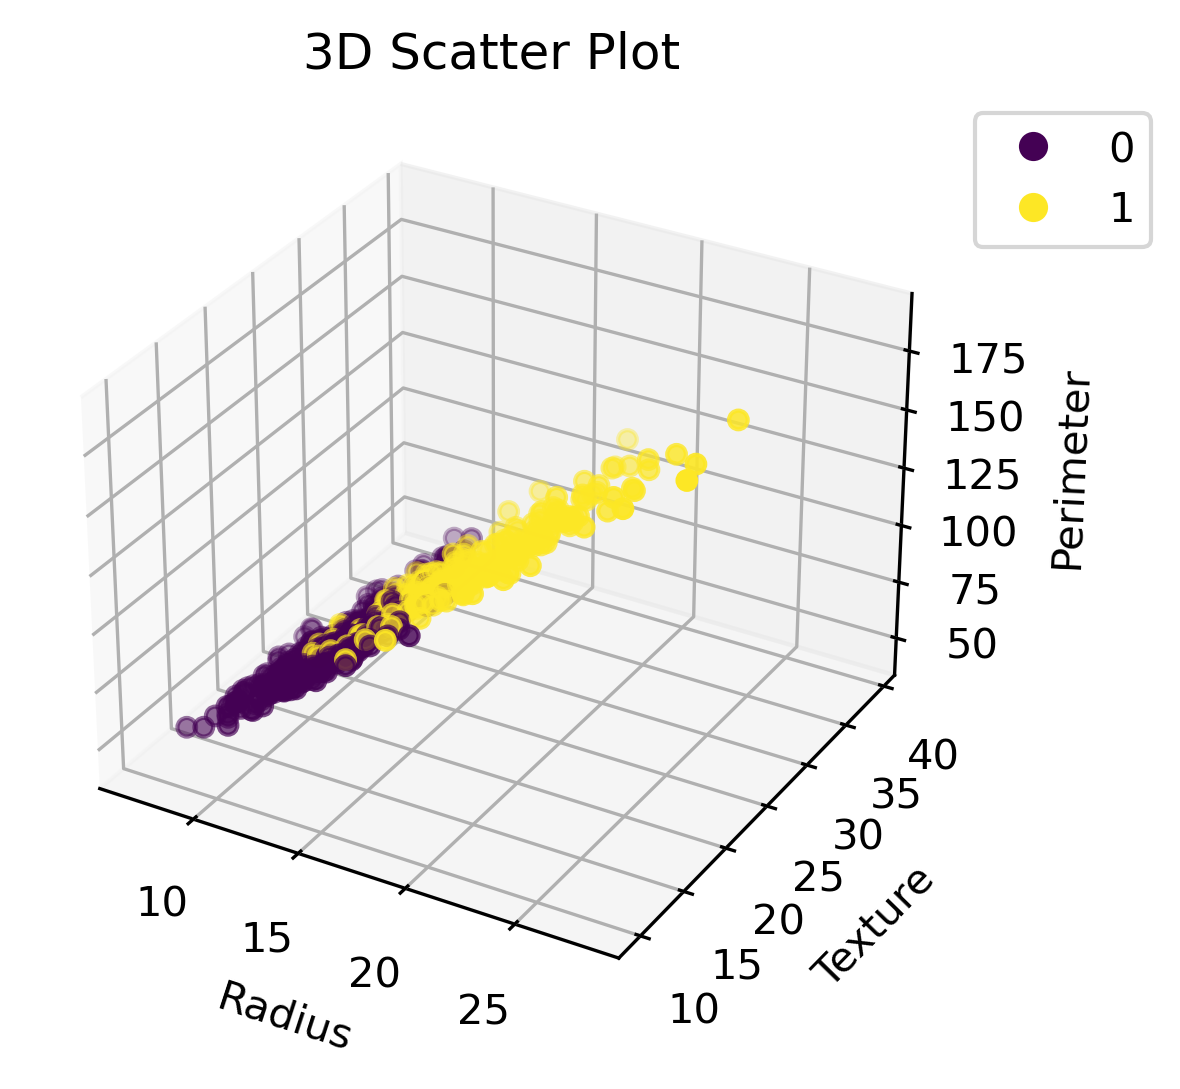

In [20]:
# Create 3D scatter plot using Matplotlib 
fig = plt.figure(figsize = (6, 4), dpi = 300)
ax = fig.add_subplot(111, projection='3d')    # Add a 3D subplot to the figure

x = df['radius_mean']
y = df['texture_mean']
z = df['perimeter_mean']
color = df['cancer_normal']

scatter = ax.scatter(x, y, z, c = color)  # Create the scatter plot
 
ax.set_xlabel('Radius')
ax.set_ylabel('Texture')
ax.set_zlabel('Perimeter')
ax.set_title('3D Scatter Plot')

# Add a legend label
plt.legend(*scatter.legend_elements(), bbox_to_anchor = (1, 1), loc = 2)

plt.show()

In [21]:
# Create 3D scatter plot using Plotly

fig = px.scatter_3d(df, 
                    x = 'radius_mean', 
                    y = 'texture_mean', 
                    z = 'perimeter_mean',
                    color = 'diagnosis')

#fig.write_image("3d_scatter.png", scale=3.0)

fig.show()

## 4. Choropleth map

In [22]:
# Create a Choropleth map
fig = px.choropleth(data,
            locations = "country",          # Specify the geographical locations (countries) for the map.
            color = "gdpPercap",           # The color intensity of the map.
            hover_name = "country",    # Display country names when hovering over map.
            locationmode = "country names",     # The mode for interpreting the location data.
            title = "Choropleth Map",                   
            color_continuous_scale = "rainbow"
)

fig.update_layout(
    margin = dict(t= 25, l=0, r=0, b=10),
    width = 600,  
    height = 400  
)

fig.update_layout(title_x = 0.45, title_y = 0.9) 

fig.show()